# Proses Brownian dalam Harga Emas 2014-2018 serta Prediksi Harga untuk 2019-2023

Kode dibawah adalah kode untuk pengambilan data csv yang telah di download

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
from math import sqrt
from scipy.stats import norm

tes = pd.read_csv('Data Emas Gabungan (2014-2018).csv')
tes = tes.iloc[0:len(tes)-2]
tes


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-01-01,1205.40,1203.60,1205.40,1202.80,0,-11.85
1,2014-01-02,1391.70,1391.70,1391.70,1391.70,0.21K,15.46
2,2014-01-03,1405.50,1405.50,1405.50,1405.50,0.14K,0.99
3,2014-01-06,1405.00,1405.00,1405.00,1405.00,0.13K,-0.04
4,2014-01-07,1395.50,1395.50,1395.50,1395.50,0.07K,-0.68
5,2014-01-08,1392.60,1392.60,1392.60,1392.60,0.19K,-0.21
6,2014-01-09,1397.90,1397.90,1397.90,1397.90,0.01K,0.38
7,2014-01-10,1413.40,1398.90,1398.90,1398.90,0.00K,1.11
8,2014-01-13,1416.00,1416.00,1416.00,1416.00,0.05K,0.18
9,2014-01-14,1411.80,1411.80,1411.80,1411.80,0.04K,-0.30


Pada kode dibawah, sudah mulai menginput data dari file csv, kemudian data tersebut diproses dengan Proses Brownian. Setelah diproses, kita dapat menginput nilai harga Emas pada penutupan terakhir tahun 2018 dan memprediksinya sebagai initial value untuk Proses Brownian ini. Kita membuat 5 kasus Brownian sebagai variasi data yang dapat dikumpulkan karena, data kurang valid bila hanya ada 1 data pegangan/parameter dalam memprediksi Harga Emas kedepannya.

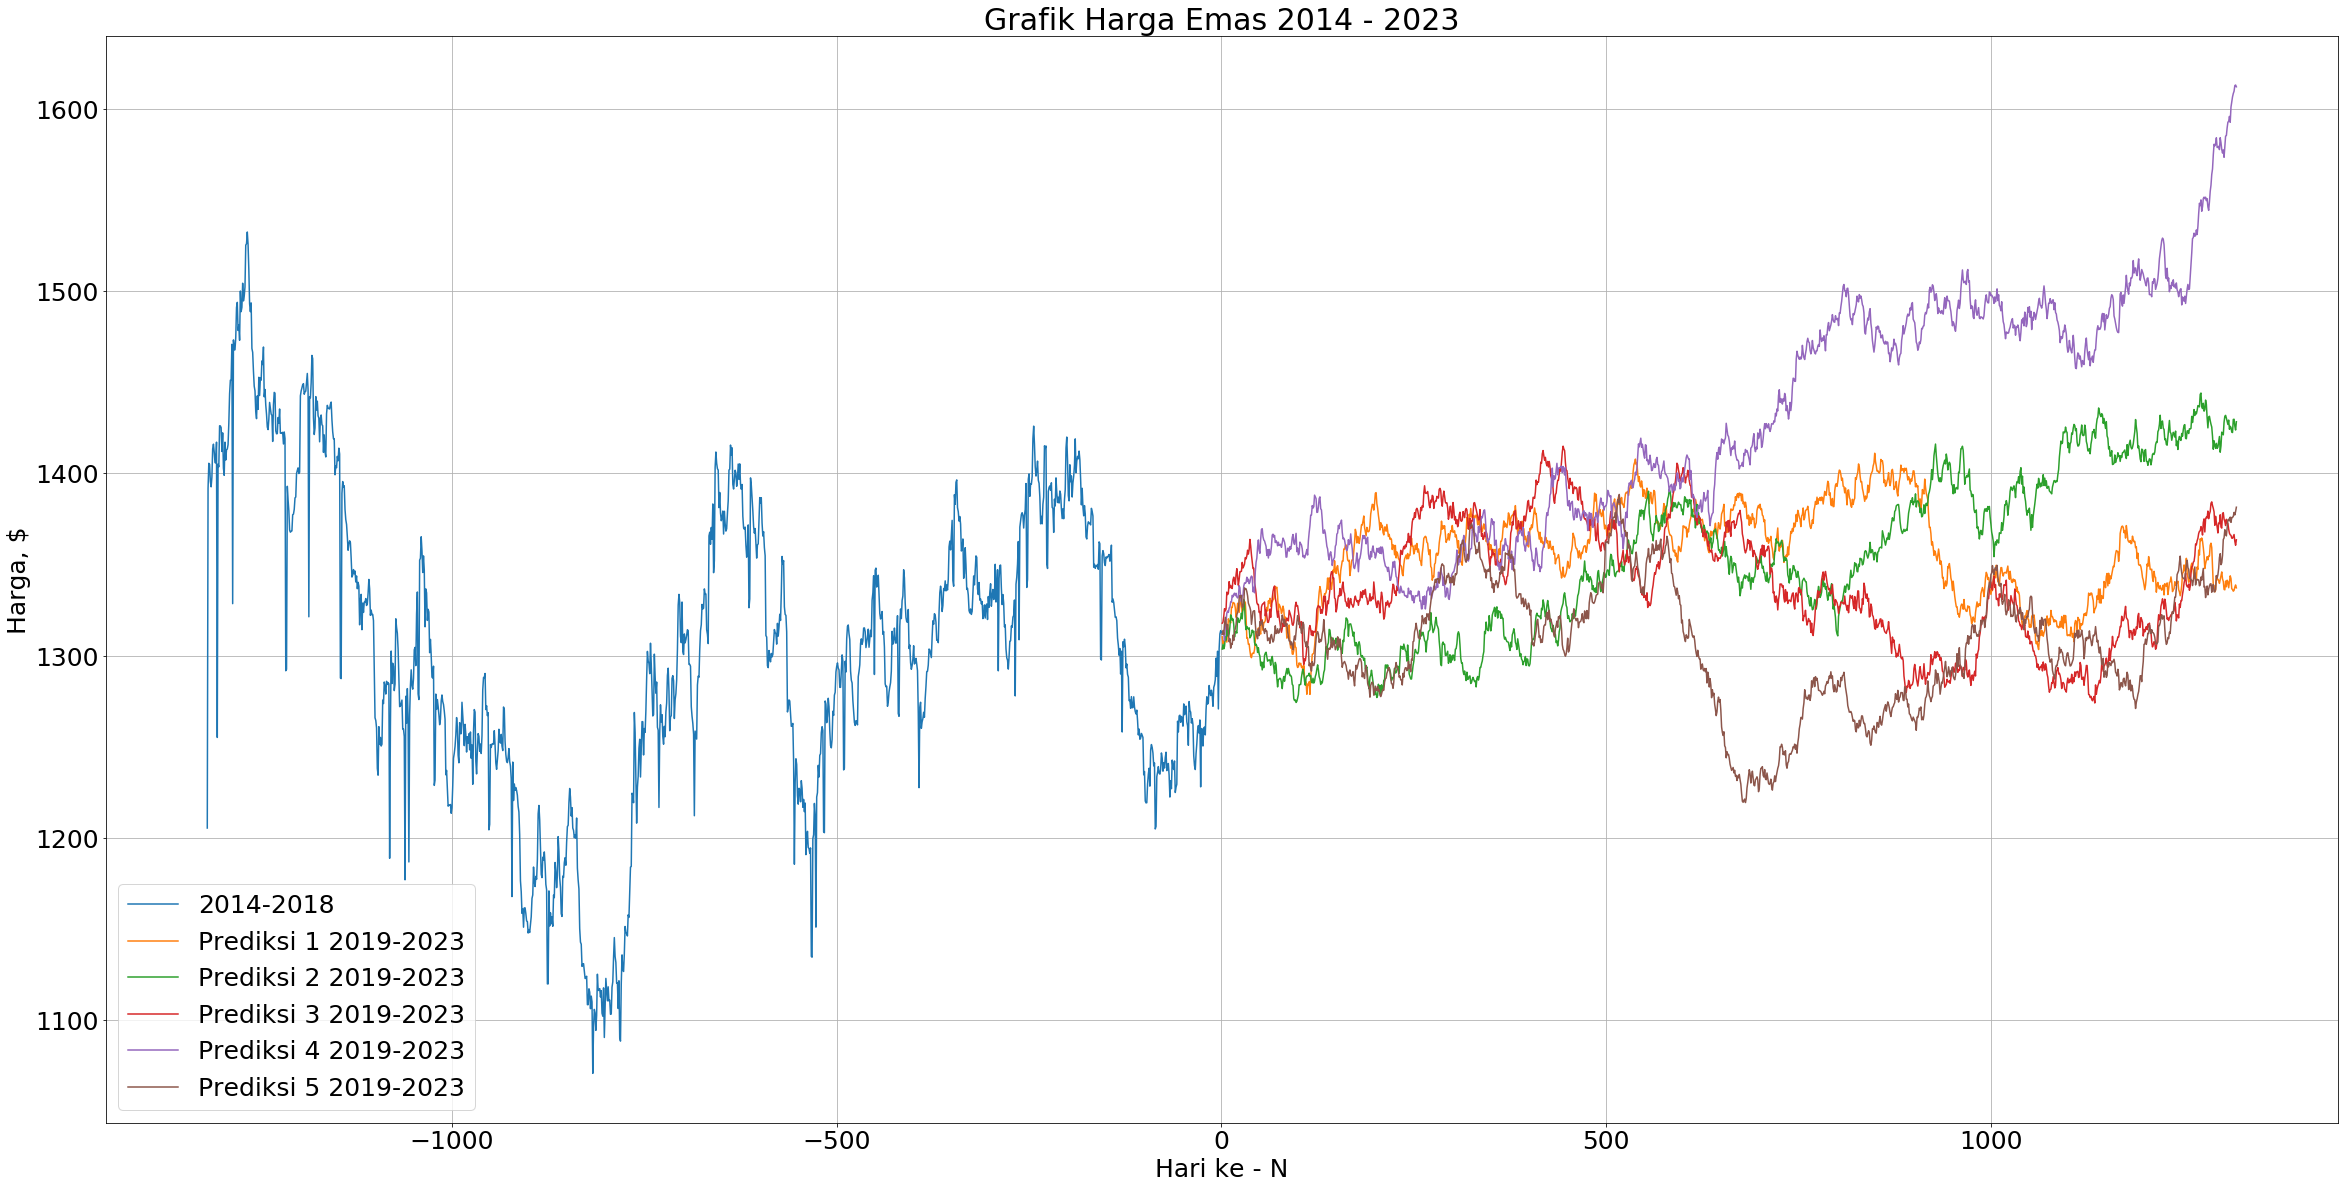

Ket: Sumbu x yang bernilai negatif menunjukan hari yang berisi data faktual
     sedangkan, sumbu x yang bernilai 0 menunjukan hari pembukaan Harga Emas pada tahun 2019.
     Grafik pada sumbu x positif merupakan 5 prediksi harga emas dengan metode Brownian.


In [68]:
Harga_Tutup = [float(i) for i in tes['Terakhir']]
Harga_Buka = [float(i) for i in tes['Pembukaan']]
rk = []
for i in range(len(Harga_Buka)):
    rk.append((Harga_Tutup[i]-Harga_Buka[i])/Harga_Buka[i])#selisih harga hari-n dibagi harga buka
    
mu=np.mean(rk) #rata-rata rk
sigma = np.std(rk) #standar deviasi rk
t = np.arange(1,len(Harga_Tutup)+1) #buat step waktu dari 1 sampai 1319
random_1 = np.random.normal(0,1,len(Harga_Tutup)) #buat array normal sebagai randomness 1
random_2 = np.random.normal(0,1,len(Harga_Buka)) #buat array normal sebagai randomness 2
random_3 = np.random.normal(0,1,len(Harga_Buka)) #buat array normal sebagai randomness 3
random_4 = np.random.normal(0,1,len(Harga_Buka)) #buat array normal sebagai randomness 4
random_5 = np.random.normal(0,1,len(Harga_Buka)) #buat array normal sebagai randomness 5
W_1 = random_1.cumsum() #buat array W_1 dengan setiap suku ke N merupakan jumlah dari suku2 sebelumnya
W_2= random_2.cumsum()
W_3= random_3.cumsum()
W_4= random_4.cumsum()
W_5= random_5.cumsum()
drift = (mu - (0.5*sigma**2))*t
diff_1 = W_1*sigma 
diff_2 = W_2*sigma
diff_3 = W_3*sigma
diff_4 = W_4*sigma
diff_5 = W_5*sigma 
S0 = 1312.50 #nilai akhir emas saat penutupan tahun 2018

S1 = np.array(S0 * np.exp(drift + diff_1)) #array kemungkinan harga pertama
S2 = np.array(S0 * np.exp(drift + diff_2)) #array kemungkinan harga kedua
S3 = np.array(S0 * np.exp(drift + diff_3))
S4 = np.array(S0 * np.exp(drift + diff_4))
S5 = np.array(S0 * np.exp(drift + diff_5))
t_1 =[i+len(t) for i in t]

m.rcParams.update({'font.size':25})
for i in range(len(t)):
    t[i]=t[i]-1319
    t_1[i]=t_1[i]-1319

plt.figure(figsize=(40,20))
plt.plot(t, Harga_Tutup,label='2014-2018')
plt.plot(t_1,S1, label='Prediksi 1 2019-2023')
plt.plot(t_1,S2,label='Prediksi 2 2019-2023')
plt.plot(t_1,S3, label='Prediksi 3 2019-2023')
plt.plot(t_1,S4, label='Prediksi 4 2019-2023')
plt.plot(t_1,S5, label='Prediksi 5 2019-2023')
plt.title('Grafik Harga Emas 2014 - 2023')
plt.grid(b=None,which='major',axis='both')
plt.xlabel('Hari ke - N')
plt.ylabel('Harga, $')
plt.legend()
plt.show()
print("Ket: Sumbu x yang bernilai negatif menunjukan hari yang berisi data faktual")
print("     sedangkan, sumbu x yang bernilai 0 menunjukan hari pembukaan Harga Emas pada tahun 2019.")
print("     Grafik pada sumbu x positif merupakan 5 prediksi harga emas dengan metode Brownian.")


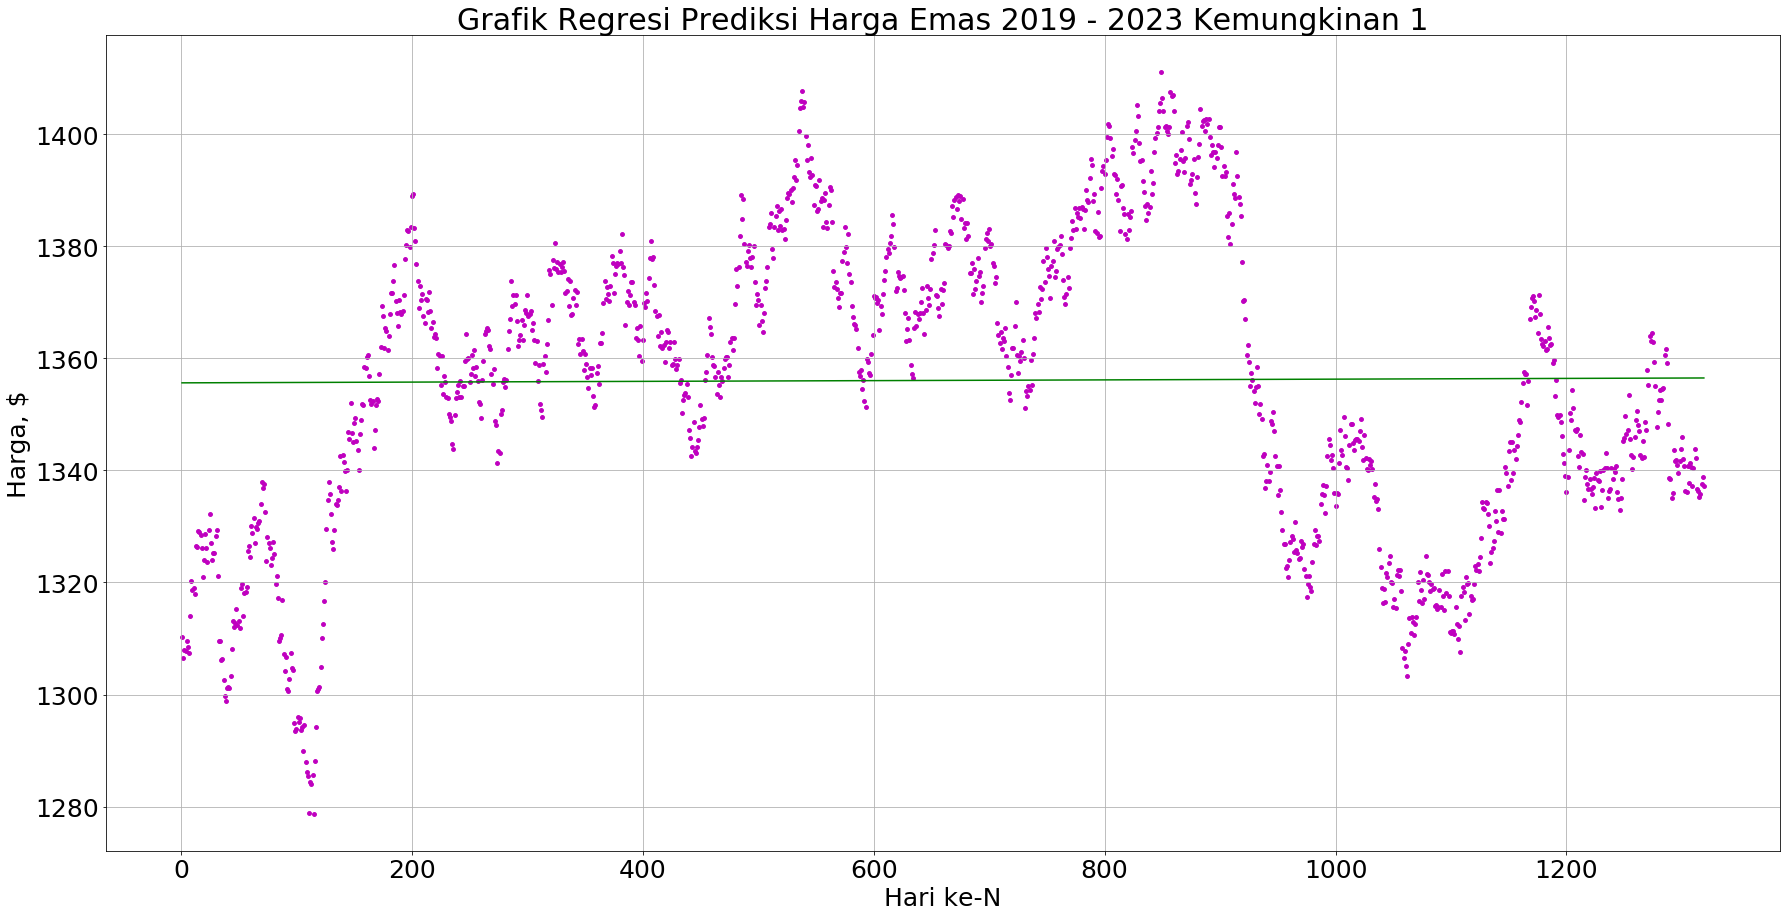

Persamaan garis yang dibentuk dari regresi ini adalah:
y = 0.000659773458161598x + 1355.6372947242764


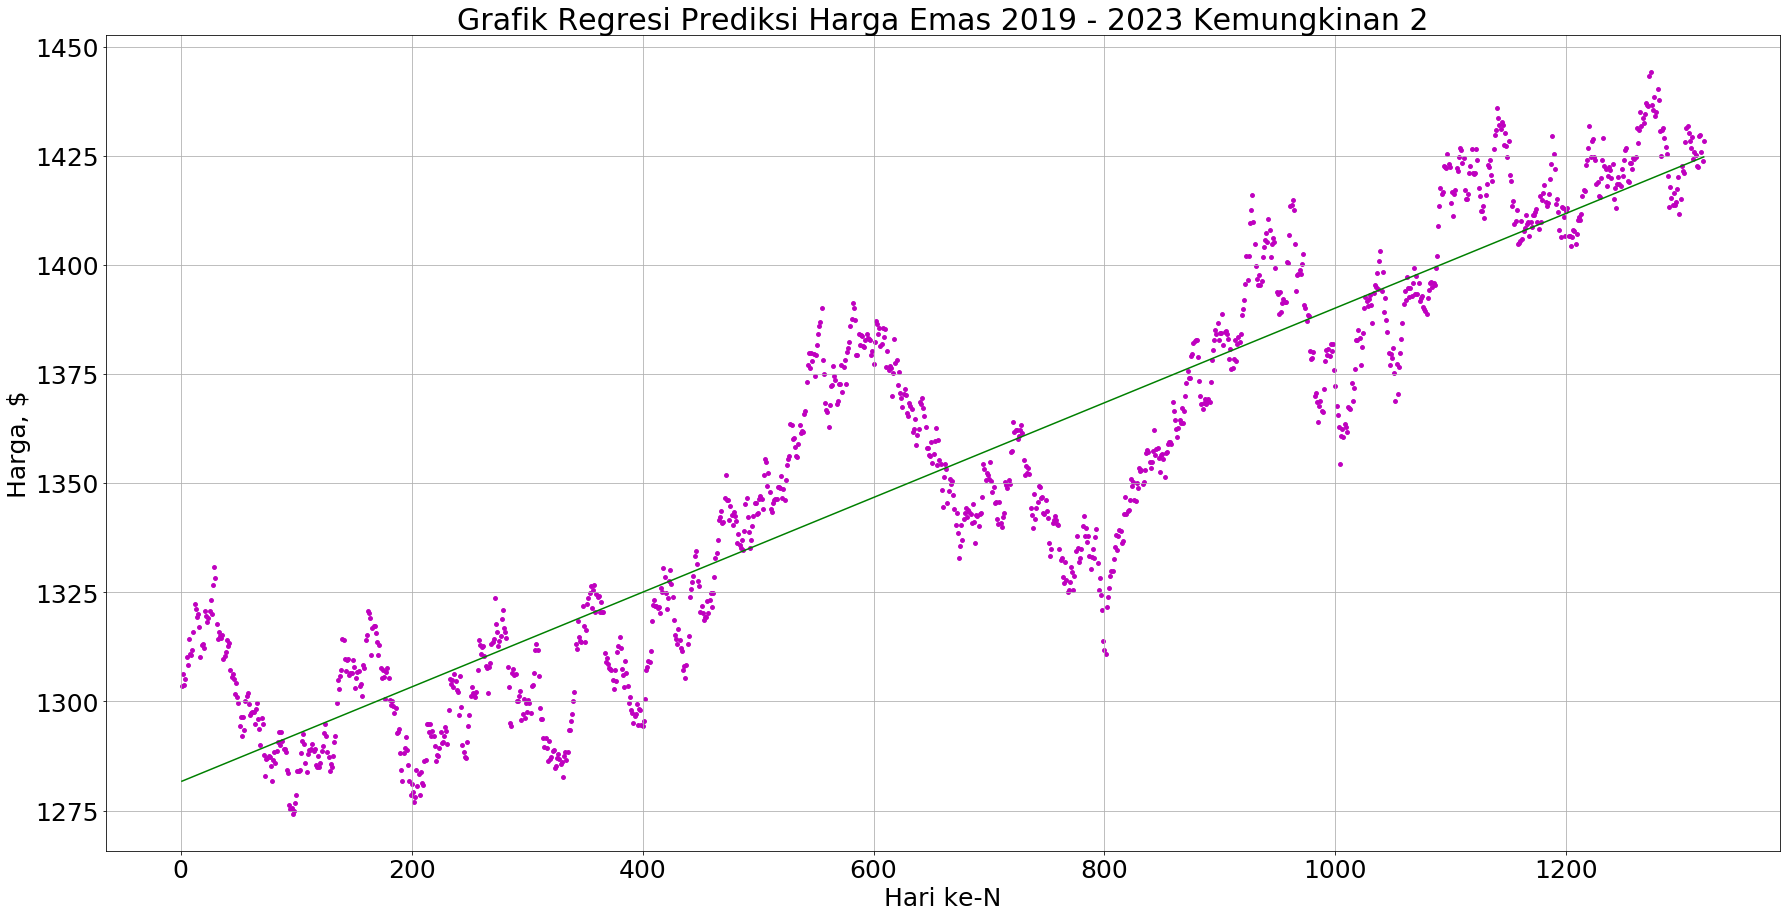

Persamaan garis yang dibentuk dari regresi ini adalah:
y = 0.10847380082697965x + 1281.6394051783946


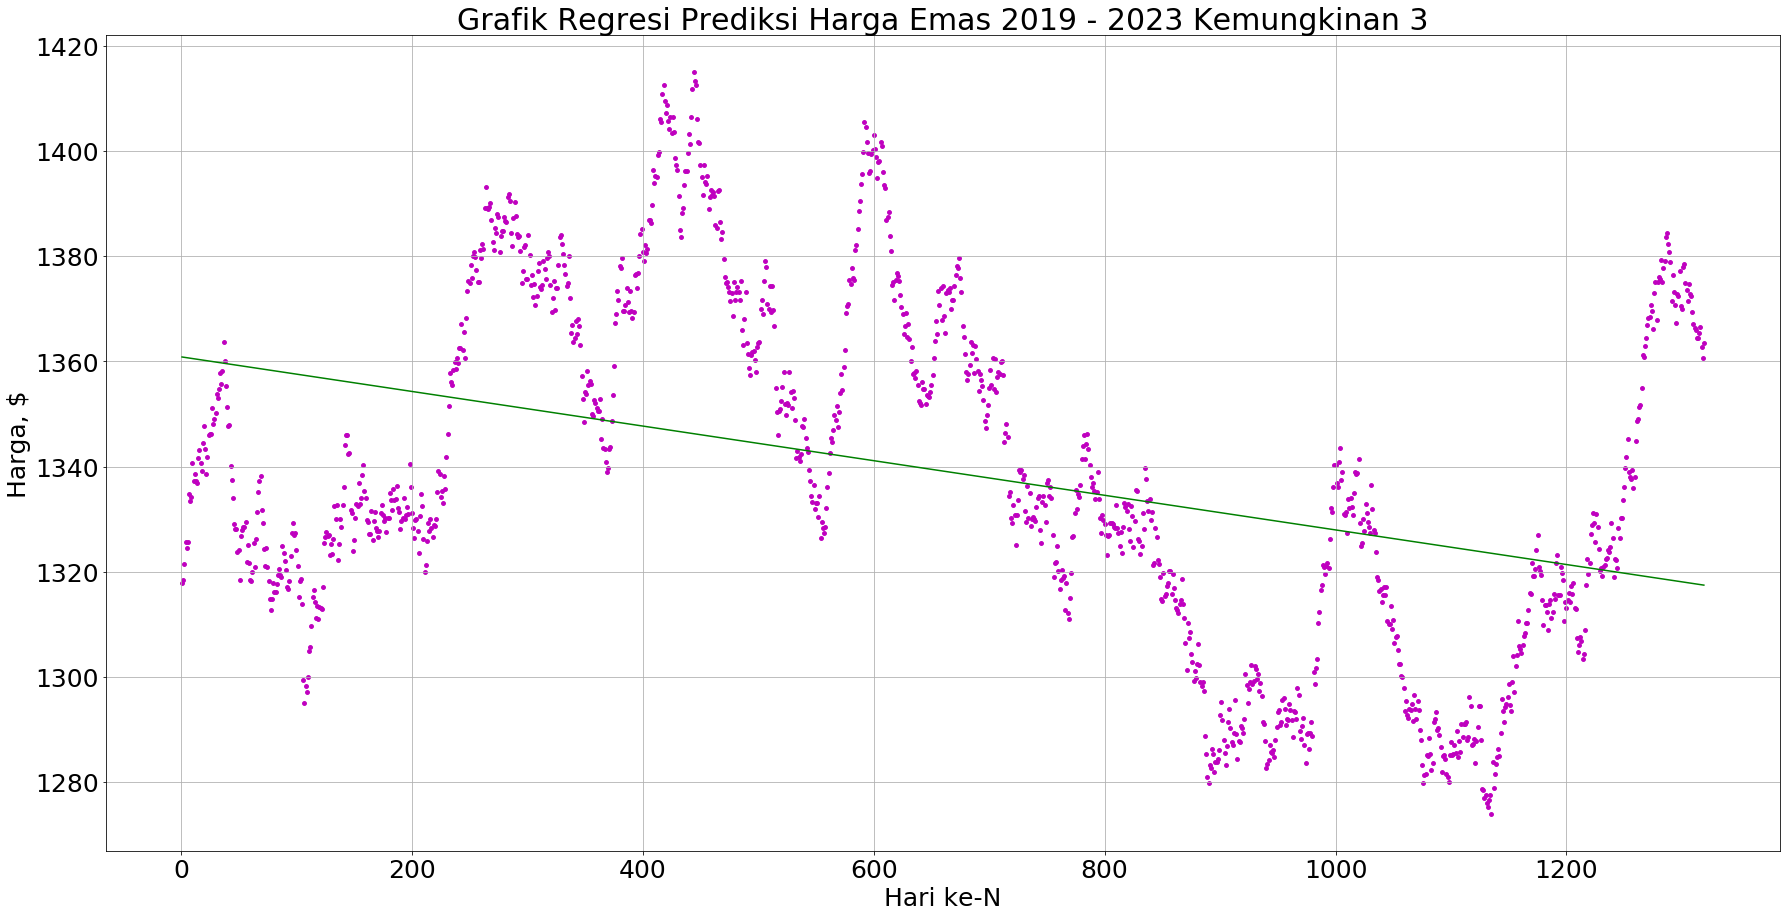

Persamaan garis yang dibentuk dari regresi ini adalah:
y = -0.032903840165181907x + 1360.8518613483623


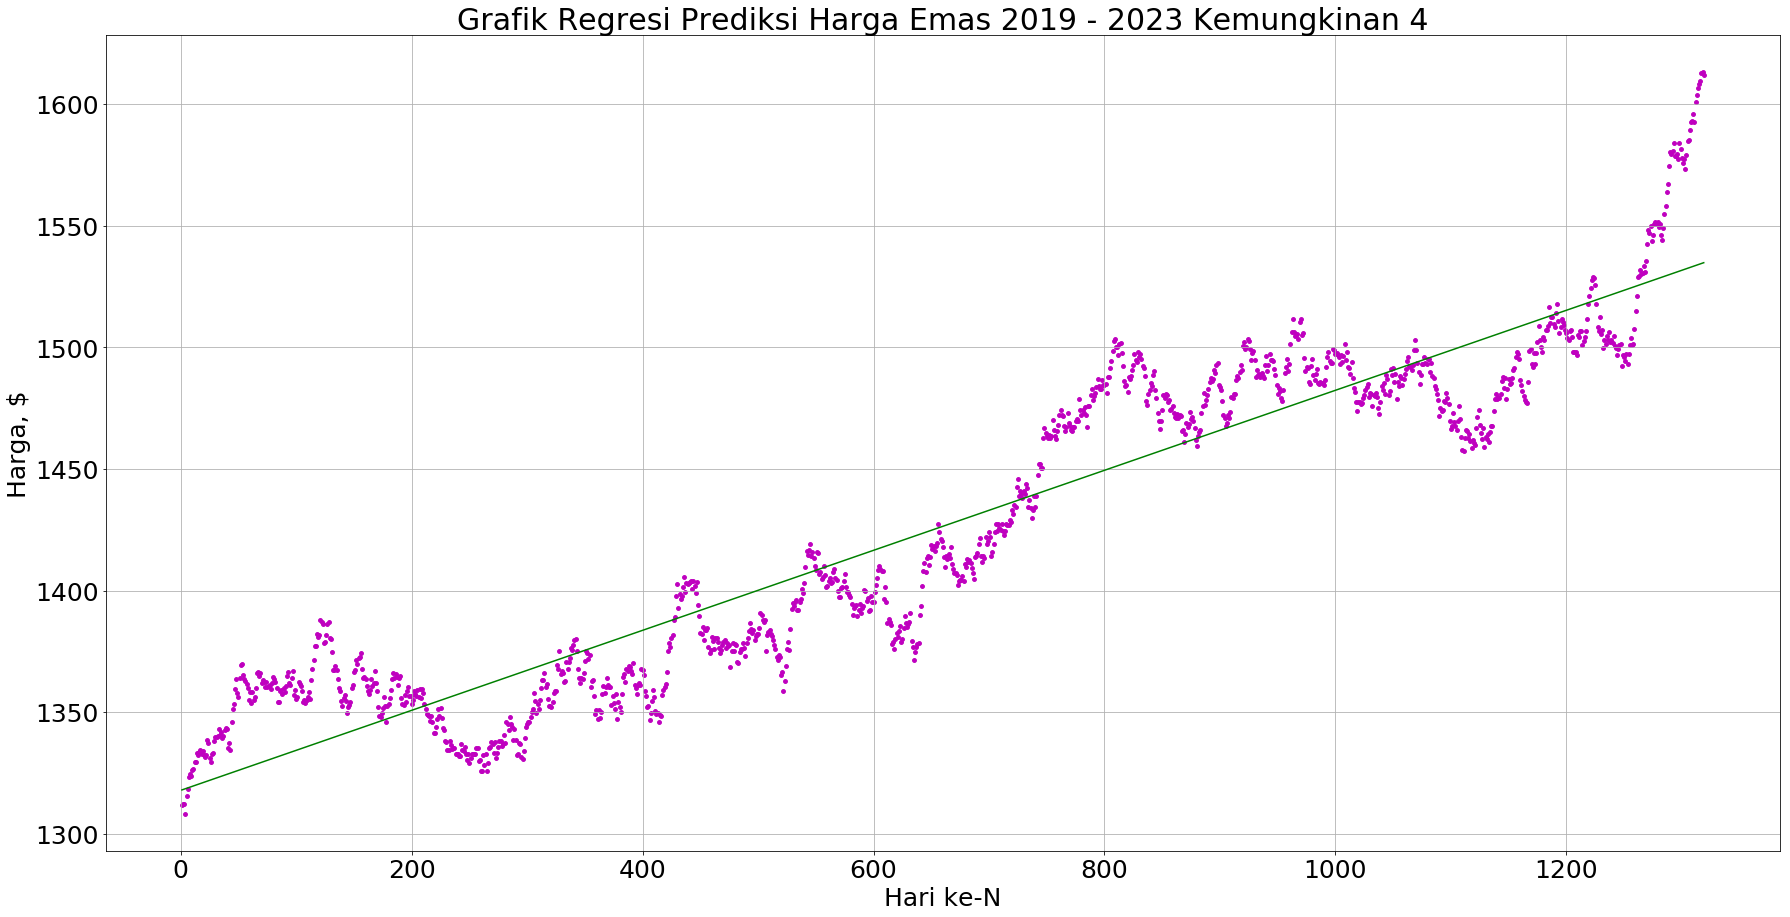

Persamaan garis yang dibentuk dari regresi ini adalah:
y = 0.1645106893388002x + 1317.8240846227707


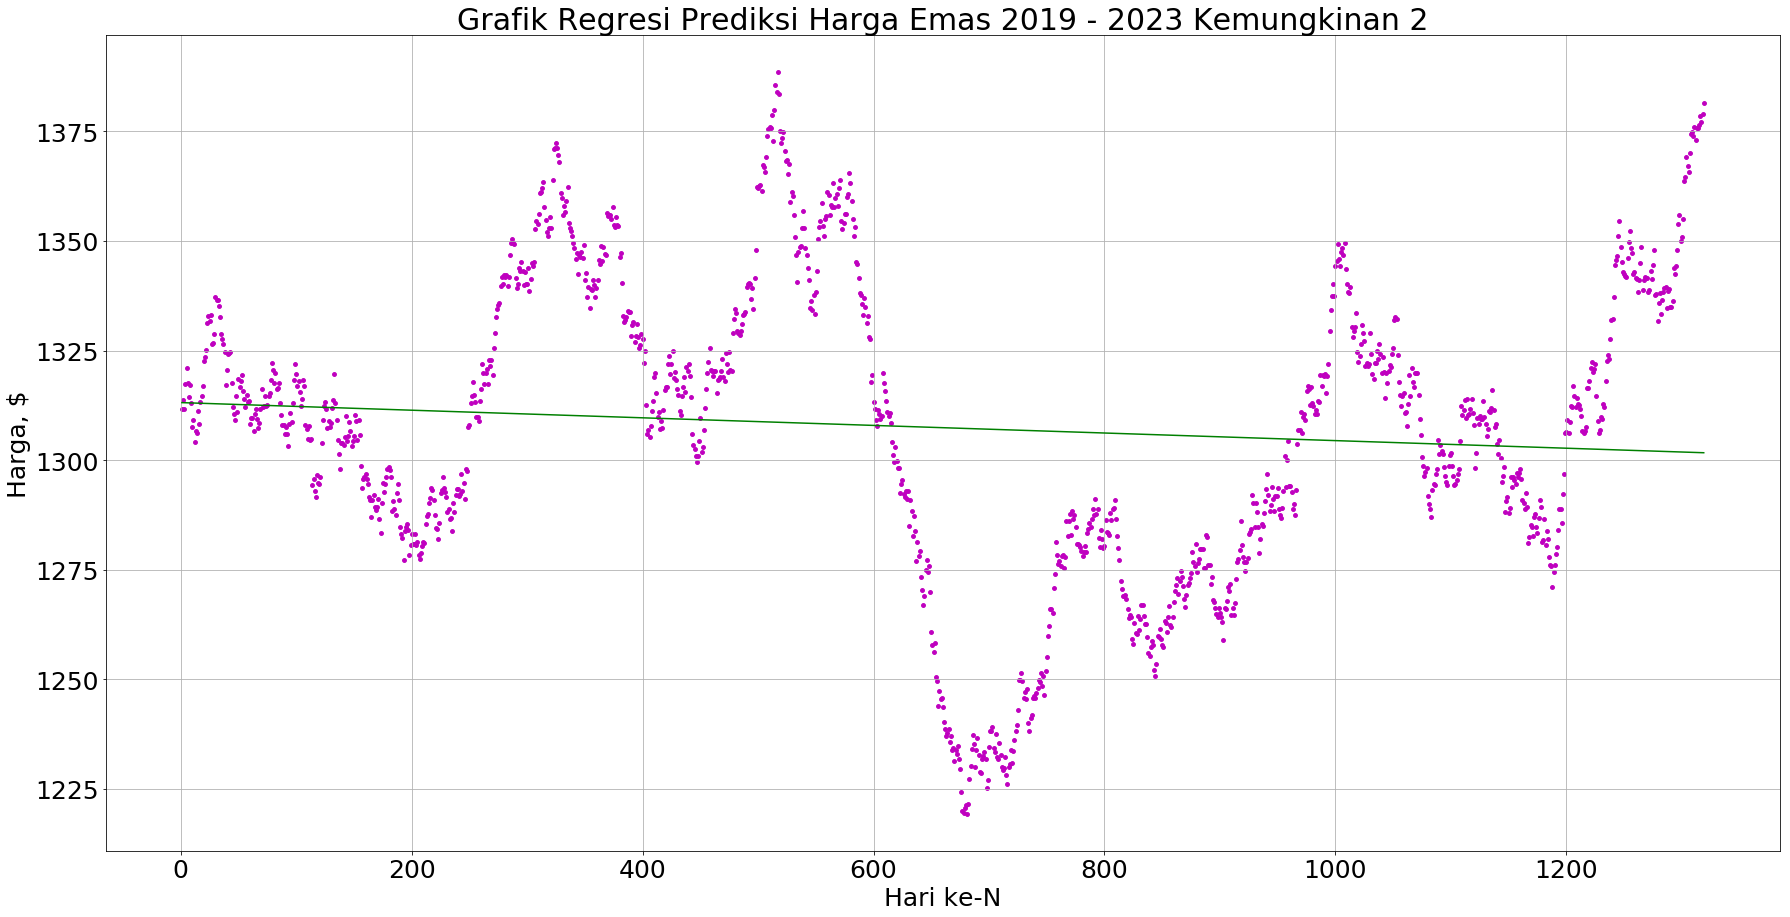

Persamaan garis yang dibentuk dari regresi ini adalah:
y = -0.0086681546745975x + 1313.139785829754


In [69]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
    # mean of x and y vector 
    m_x= np.mean(x)
    m_y= np.mean(y)
    cross_xy = []
    cross_xx =[]
    for i in range(len(x)):
        cross_xy.append(x[i]*y[i])
        cross_xx.append(x[i]*x[i])
    # menghitung cross-deviation and deviation dengan x 
    SS_xy = np.sum(cross_xy) - (n*m_y*m_x) 
    SS_xx = np.sum(cross_xx) - (n*m_x*m_x) 
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b):  
    plt.grid(b=None,which='major',axis='both')
    m.rcParams.update({'font.size':25})
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", marker = "o", s = 15) 
    # predicted response vector
    y_pred = []
    for i in range(len(x)):
        y_pred.append(b[0] + b[1]*x[i])
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
    # putting labels 
    plt.xlabel('Hari ke-N') 
    plt.ylabel('Harga, $') 
    # function to show plot 
    plt.show()




lin_1 = estimate_coef(t_1,S1)
lin_2 = estimate_coef(t_1,S2)
lin_3 = estimate_coef(t_1,S3)
lin_4 = estimate_coef(t_1,S4)
lin_5 = estimate_coef(t_1,S5)
plt.figure(figsize=(30,15))
plt.title('Grafik Regresi Prediksi Harga Emas 2019 - 2023 Kemungkinan 1')
plot_regression_line(t_1,S1,lin_1)
print("Persamaan garis yang dibentuk dari regresi ini adalah:")
print("y = {}x + {}".format(lin_1[1],lin_1[0]))
plt.figure(figsize=(30,15))
plt.title('Grafik Regresi Prediksi Harga Emas 2019 - 2023 Kemungkinan 2')
plot_regression_line(t_1,S2,lin_2)
print("Persamaan garis yang dibentuk dari regresi ini adalah:")
print("y = {}x + {}".format(lin_2[1],lin_2[0]))
plt.figure(figsize=(30,15))
plt.title('Grafik Regresi Prediksi Harga Emas 2019 - 2023 Kemungkinan 3')
plot_regression_line(t_1,S3,lin_3)
print("Persamaan garis yang dibentuk dari regresi ini adalah:")
print("y = {}x + {}".format(lin_3[1],lin_3[0]))
plt.figure(figsize=(30,15))
plt.title('Grafik Regresi Prediksi Harga Emas 2019 - 2023 Kemungkinan 4')
plot_regression_line(t_1,S4,lin_4)
print("Persamaan garis yang dibentuk dari regresi ini adalah:")
print("y = {}x + {}".format(lin_4[1],lin_4[0]))
plt.figure(figsize=(30,15))
plt.title('Grafik Regresi Prediksi Harga Emas 2019 - 2023 Kemungkinan 2')
plot_regression_line(t_1,S5,lin_5)
print("Persamaan garis yang dibentuk dari regresi ini adalah:")
print("y = {}x + {}".format(lin_5[1],lin_5[0]))

Kode dibawah merupakan kode untuk menampilkan data Faktual 2019 dengan data Prediksi 2019 dengan metode Brown.

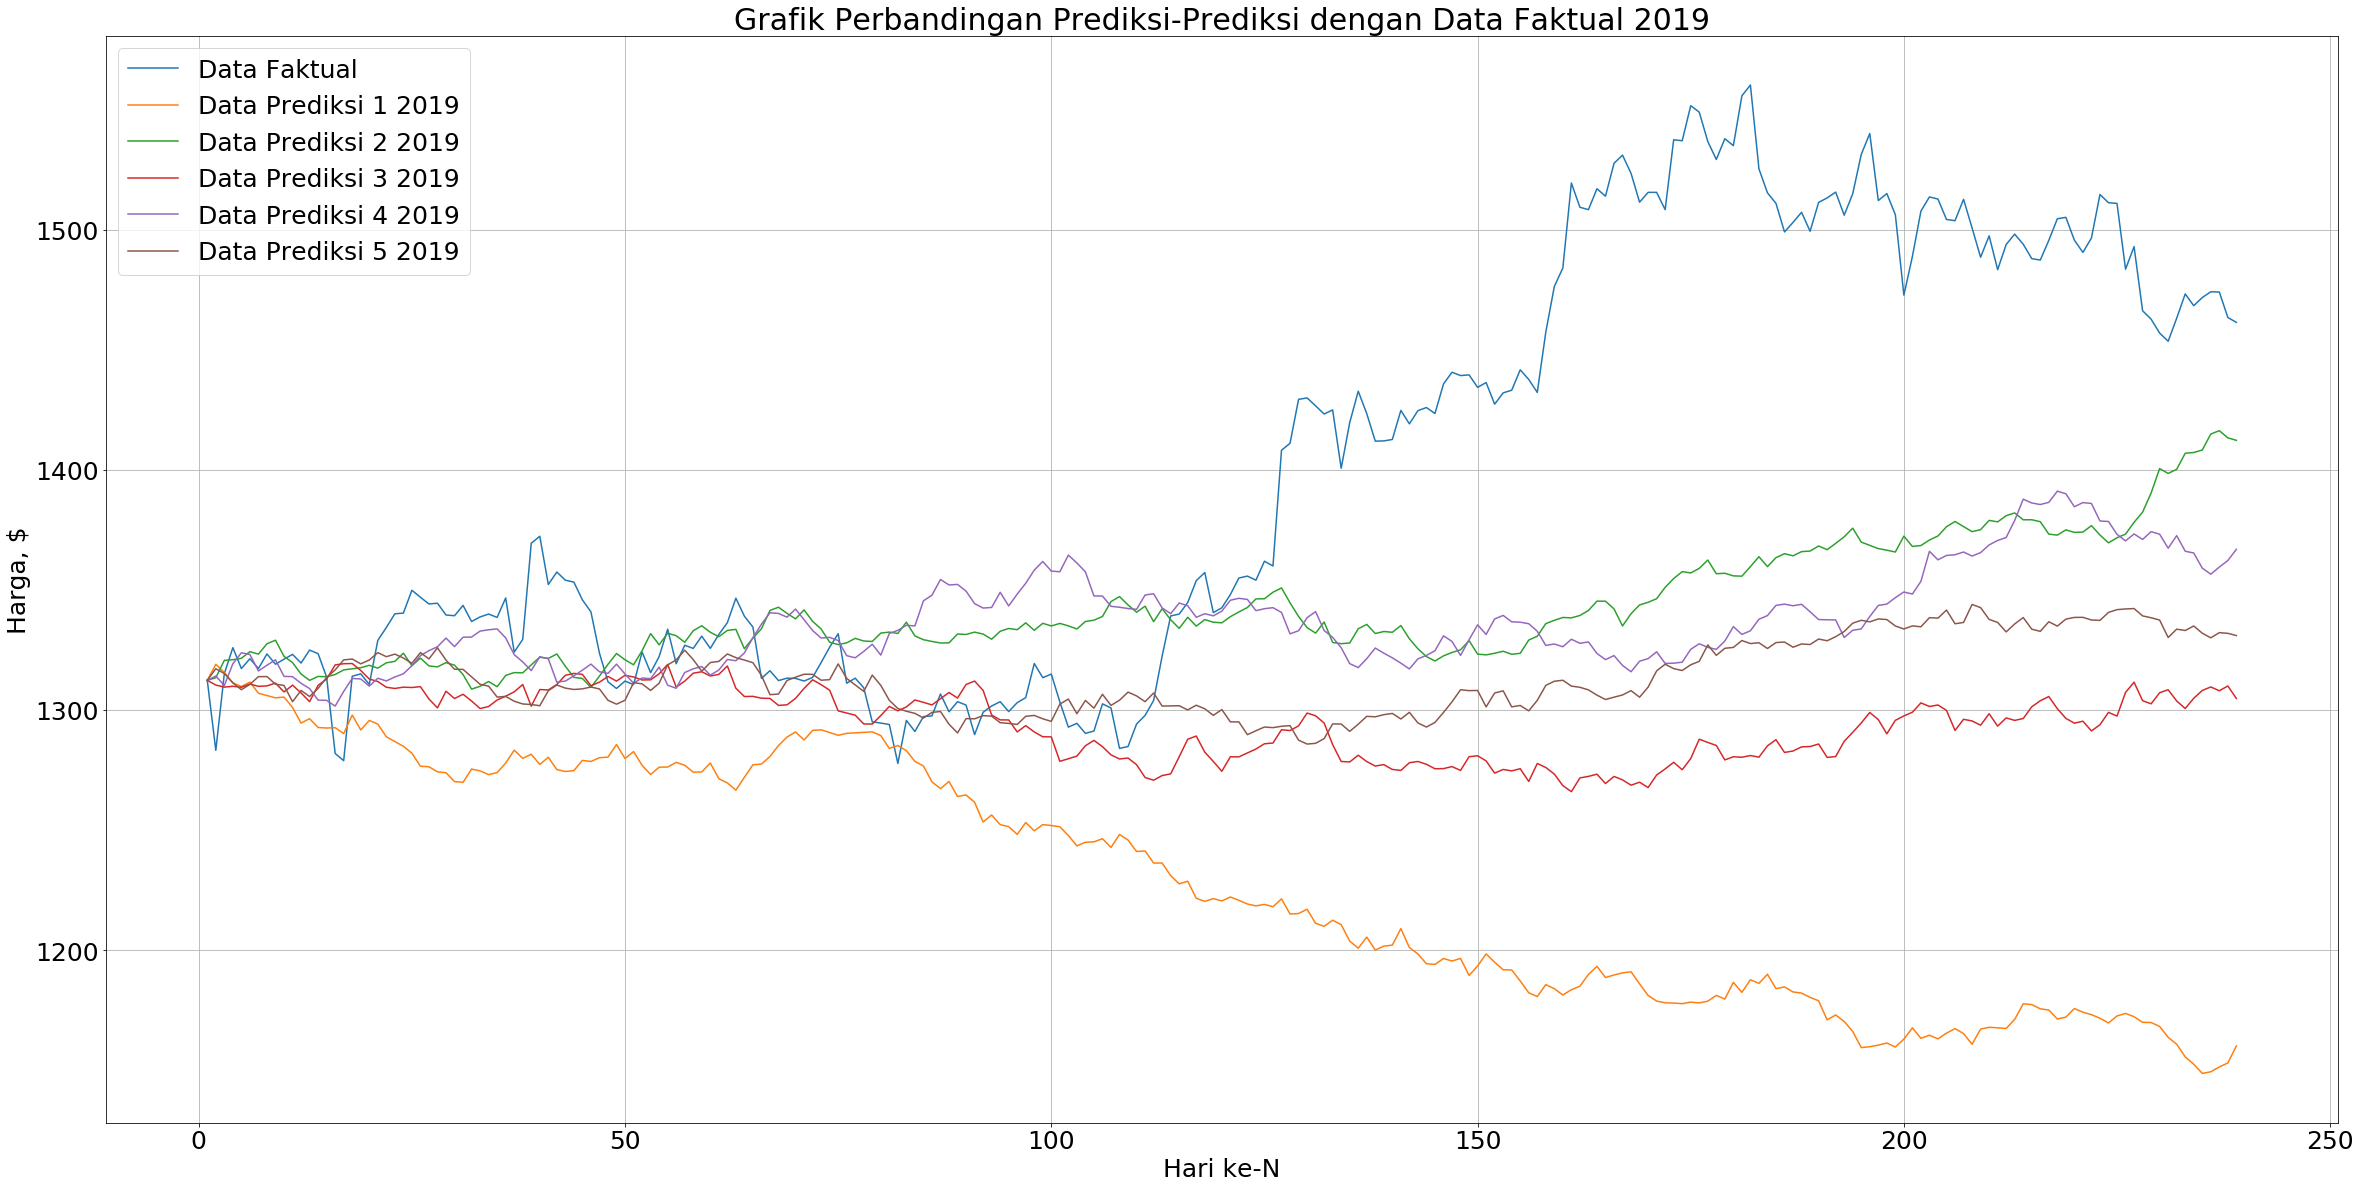

[]

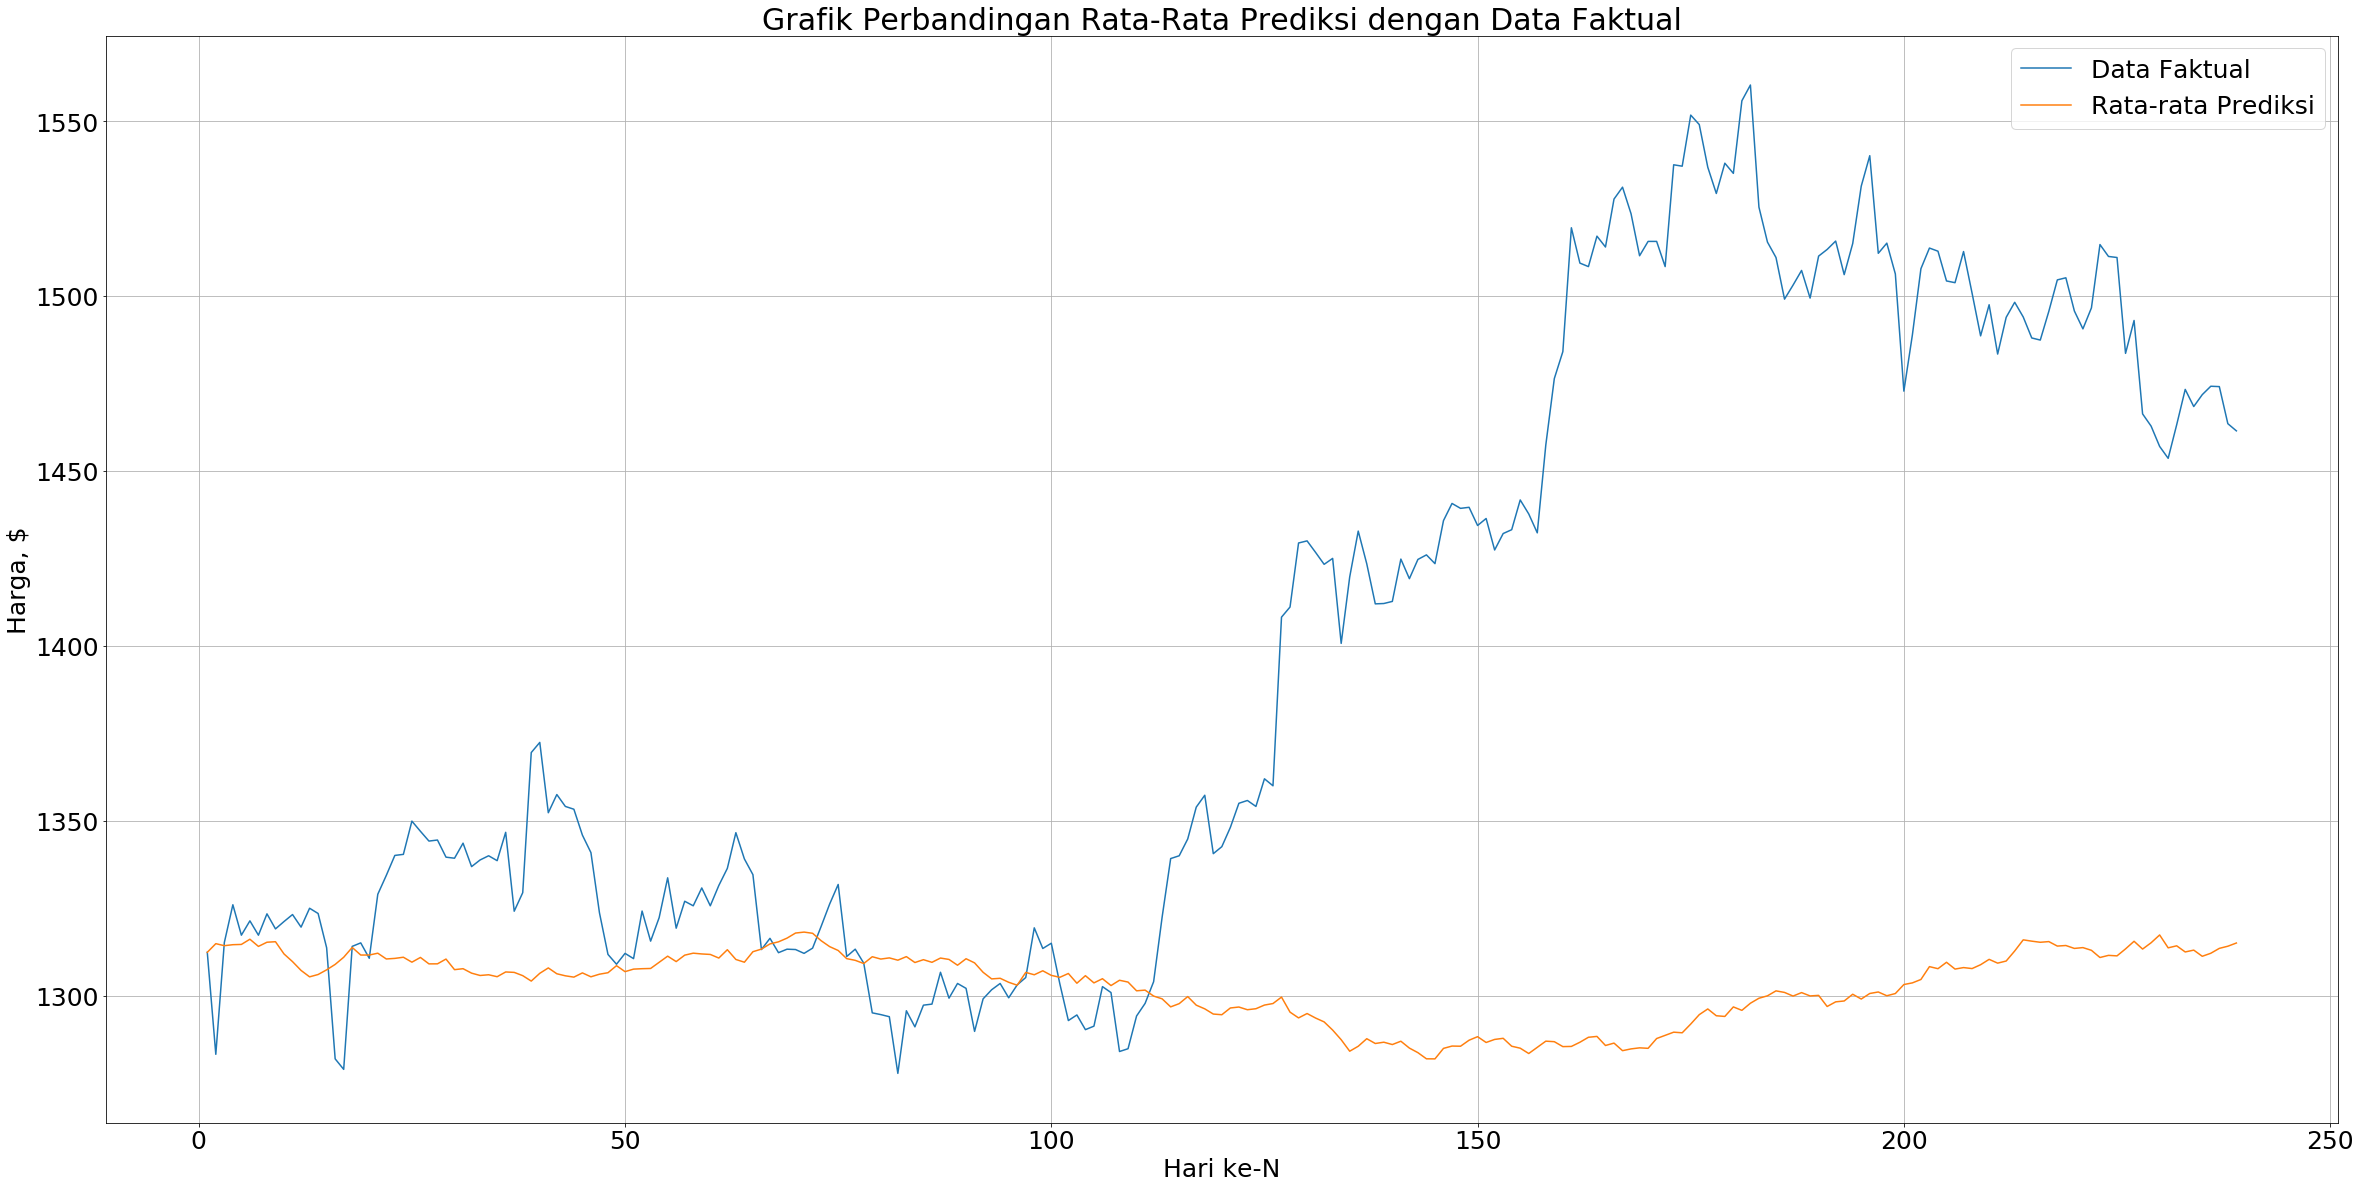

In [66]:
now = pd.read_csv('Data Kenaikkan Harga Emas 2019.csv')
now = now.iloc[:len(now)-2]
now_fix=[S0] #data faktual 2019
for i in now['Terakhir']:
    now_fix.append(float(i))

Banding_1 = S1[:len(now)]
Banding_1_fix=[S0] #data prediksi yang sampai sekarang saja
for i in Banding_1:
    Banding_1_fix.append(i)
    
Banding_2 = S2[:len(now)]
Banding_2_fix=[S0]
for i in Banding_2:
    Banding_2_fix.append(i)
    

Banding_3 = S3[:len(now)]
Banding_3_fix=[S0]
for i in Banding_3:
    Banding_3_fix.append(i)
    
Banding_4 = S4[:len(now)]
Banding_4_fix=[S0]
for i in Banding_4:
    Banding_4_fix.append(i)

Banding_5 = S5[:len(now)]
Banding_5_fix=[S0]
for i in Banding_5:
    Banding_5_fix.append(i)

plt.figure(figsize=(40,20))
t_banding = np.arange(1,len(Banding_1)+2)
plt.grid(b=None,which='major',axis='both')

plt.xlabel('Hari ke-N') 
plt.ylabel('Harga, $') 
plt.title('Grafik Perbandingan Prediksi-Prediksi dengan Data Faktual 2019')
plt.plot(t_banding,now_fix,label='Data Faktual')
plt.plot(t_banding,Banding_1_fix,label='Data Prediksi 1 2019')
plt.plot(t_banding,Banding_2_fix,label='Data Prediksi 2 2019')
plt.plot(t_banding,Banding_3_fix,label='Data Prediksi 3 2019')
plt.plot(t_banding,Banding_4_fix,label='Data Prediksi 4 2019')
plt.plot(t_banding,Banding_5_fix,label='Data Prediksi 5 2019')

rata2 =[]
for i in range(len(Banding_1_fix)):
    x = (Banding_1_fix[i]+Banding_2_fix[i]+Banding_3_fix[i]+Banding_4_fix[i]+Banding_5_fix[i])/5
    rata2.append(x)

plt.legend()
plt.show()


plt.figure(figsize=(40,20))
plt.grid(b=None,which='major',axis='both')

plt.xlabel('Hari ke-N') 
plt.ylabel('Harga, $') 
plt.title('Grafik Perbandingan Rata-Rata Prediksi dengan Data Faktual')
plt.plot(t_banding,now_fix,label='Data Faktual')
plt.plot(t_banding,rata2,label='Rata-rata Prediksi')
plt.legend()
plt.plot()


